# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("darkgrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

## 2. Read the Data  

In [2]:
df = pd.read_excel('world_military_power.xlsx')

In [3]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
2,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,0.000,Albania,467.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.000,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
3,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,880.000,Algeria,7361.000,Algeria,320.000,Algeria,240.000,Algeria,316.000,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.000,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
4,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000,

In [4]:
df = pd.read_excel('world_military_power.xlsx', header=[1])

In [5]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
1,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,0.000,Albania,467.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.000,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
2,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,880.000,Algeria,7361.000,Algeria,320.000,Algeria,240.000,Algeria,316.000,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.000,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
3,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000,Angola,379.000,Angola,595.000,Angola,28.000,Angola,357.000,Angola,115.000,Angola,57.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.000,Angola,"16,66,000",Angola,82300.000,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000
4,Argentina,0.652,Argentina,227.000,Argentina,24.000,Argentina,7.000,Argentina,9.000,Argentina,64.000,Argentina,100.000,Argentina,0.000,Argentina,370.000,Argentina,739.000,Argentina,83.000,Argentina,172.000,Argentina,26.000,Argentina,49.000,Argentina,0.000,Argentina,2.000,Argentina,4.000,Argentina,0.000,Argentina,"4,20,00,00,000",Argentina,"2,14,90

# 3. EDA

In [6]:
df.shape

(138, 60)

### 3.1. Implement basic steps to see how your data looks like

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

### 3.2. Convert multi index columns to one level

In [8]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,1062.000,Afghanistan,0.000,Afghanistan,176.000,Afghanistan,50.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.000,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
1,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000,Albania,0.000,Albania,467.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.000,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
2,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000,Algeria,880.000,Algeria,7361.000,Algeria,320.000,Algeria,240.000,Algeria,316.000,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.000,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
3,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000,Angola,379.000,Angola,595.000,Angola,28.000,Angola,357.000,Angola,115.000,Angola,57.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.000,Angola,"16,66,000",Angola,82300.000,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000
4,Argentina,0.652,Argentina,227.000,Argentina,24.000,Argentina,7.000,Argentina,9.000,Argentina,64.000,Argentina,100.000,Argentina,0.000,Argentina,370.000,Argentina,739.000,Argentina,83.000,Argentina,172.000,Argentina,26.000,Argentina,49.000,Argentina,0.000,Argentina,2.000,Argentina,4.000,Argentina,0.000,Argentina,"4,20,00,00,000",Argentina,"2,14,90

### 3.3. Detect and drop duplicated columns

In [9]:
df.select_dtypes('float64')

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value,Total Border Coverage value
0,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,43.000,5987.000
1,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,4.000,691.000
2,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,157.000,6734.000
3,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,176.000,5369.000
4,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,1138.000,11968.000
5,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,38.000,150.000,68.000,0.000,NaN,NaN,NaN,NaN,11.000,1570.000
6,0.323,464.000,82.000,6.000,38.000,174.000,133.000,22.000,59.000,3051.000,0.000,54.000,0.000,48.000,2.000,6.000,2.000,8.000,480.000,NaN
7,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,33.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,52.000,2524.000
8,0.946,147.000,17.000,12.000,1.000,29.000,88.000,17.000,570.000,1451.000,187.000,227.000,162.000,31.000,0.000,4.000,0.000,1.000,37.000,2468.000
9,1.855,109.000,17.000,0.000,2.000,37.000,65.000,22.000,180.000,843.000,33.000,26.000,17.000,39.000,0.000,0.000,0.000,1.000,4.000,NaN


In [10]:
df.select_dtypes('float64').shape

(138, 20)

In [11]:
df.select_dtypes('object')

,Military Strength,Aircraft Strength,Fighter/Interceptor Strength,Attack Aircraft Strength,Transport Aircraft Fleet Strength,Trainer Aircraft Fleet,Helicopter Fleet Strength,Attack Helicopter Fleet Strength,Tank Strength,AFV/APC Strength,Self-Propelled Artillery Strength,Towed Artillery Strength,Rocket Projector Strength,Navy Fleet Strengths,Aircraft Carrier Fleet Strength,Submarine Fleet Strength,Destroyer Fleet Strength,Frigate Fleet Strength,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage
0,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,Afghanistan,0.000,Afghanistan,5500.000,Afghanistan,0.000,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan
1,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,Albania,16000.000,Albania,42500.000,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania
2,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria
3,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,Angola,"16,66,000",Angola,82300.000,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola
4,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.000,Argentina,11000.000,Argentina
5,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,NaN,NaN,NaN,NaN,Armenia,"1,38,50,00,000",Armenia,"10,41,00,00,000",Armenia,Armenia,0.000,Armenia,47500.000,Armenia,0.000,Armenia,"16,96,085",Armenia,"30,38,217",Armenia,29743.000,NaN,NaN,Armenia,0.000,Armenia
6,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,"26,30,00,00,000",Australia,"17,14,00,00,00,000",Australia,Australia,"2,63,000",Australia,"10,05,000",Australia,"1,82,10,00,000",Australia,"1,08,08,002",Australia,"2,34,70,145",Australia,"77,41,220",Australia,25760.000,Australia,2000.000,NaN
7,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,Austria,NaN,NaN,NaN,NaN,Austria,"3,38,00,00,000",Austria,"6,30,80,00,00,000",Austria,Austria,14260.000,Austria,"2,15,000",Austria,"4,30,00,000",Austria,"40,17,691",Austria,"87,93,370",Austria,83871.000,NaN,NaN,Austri

In [12]:
df.select_dtypes('object').shape

(138, 40)

In [13]:
res = []
for i in df.columns[1:]:
    if df[i].values.any() == df['Military Strength'].values.any():
        res.append(i)
print(res)

['Aircraft Strength', 'Fighter/Interceptor Strength', 'Attack Aircraft Strength', 'Transport Aircraft Fleet Strength', 'Trainer Aircraft Fleet', 'Helicopter Fleet Strength', 'Attack Helicopter Fleet Strength', 'Tank Strength', 'AFV/APC Strength', 'Self-Propelled Artillery Strength', 'Towed Artillery Strength', 'Rocket Projector Strength', 'Navy Fleet Strengths', 'Aircraft Carrier Fleet Strength', 'Submarine Fleet Strength', 'Destroyer Fleet Strength', 'Frigate Fleet Strength', 'defense spending budget', 'External Debt', 'Airport Totals', 'Oil Production', 'Oil Consumption', 'Proven Oil Reserves', 'Available Manpower', 'Total Population', 'Total Square Land Area', 'Total Coastline Coverage', 'Total Waterway Coverage', 'Total Border Coverage']


In [14]:
len(res)

29

In [15]:
df.drop(res, axis=1, inplace=True)

In [16]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43.000,0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,"25,00,00,000","9,50,50,00,000",4.000,16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,"13,00,00,00,000","6,26,00,00,000",157.000,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,"7,00,00,00,000","42,08,00,00,000",176.000,"16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,"4,20,00,00,000","2,14,90,00,00,000",1138.000,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000,11968.000


In [17]:
df.shape

(138, 31)

In [18]:
df.rename(columns={'Military Strength':'Country'}, inplace=True)

### 3.4. Check for missing values 

In [19]:
df.isnull().sum()

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

### 3.5. Fix the dtypes

In [20]:
df.select_dtypes('object')

,Country,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.000,5500.000,0.000,"1,43,25,743","3,49,40,837","6,52,230",0.000,1200.000
1,Albania,"25,00,00,000","9,50,50,00,000",16000.000,42500.000,"16,83,00,000","15,19,438","30,57,220",28748.000,362.000,41.000
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.000,0.000
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.000,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.000,1300.000
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.000,11000.000
5,Armenia,"1,38,50,00,000","10,41,00,00,000",0.000,47500.000,0.000,"16,96,085","30,38,217",29743.000,NaN,0.000
6,Australia,"26,30,00,00,000","17,14,00,00,00,000","2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.000,2000.000
7,Austria,"3,38,00,00,000","6,30,80,00,00,000",14260.000,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.000,NaN,0.000
8,Azerbaijan,"2,80,50,00,000","17,41,00,00,000","7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600.000,713.000,0.000
9,Bahrain,"1,41,50,00,000","52,15,00,00,000",45000.000,55000.000,"12,46,00,000","8,06,505","14,22,659",760.000,161.000,0.000


In [21]:
import re
def convert(x):
    if x is not np.nan:
        x = str(x)
        y = re.findall('\d+', x)
        if '.' in x:
            return float(''.join(y[:-1]))
        else:
            return float(''.join(y))

In [22]:
for i in df.select_dtypes('object').columns[1:]:
    df[i] = df[i].apply(convert)

In [23]:
df.select_dtypes('object')

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
5,Armenia
6,Australia
7,Austria
8,Azerbaijan
9,Bahrain


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [25]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000,652230.000,0.000,1200.000,5987.000
1,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000,28748.000,362.000,41.000,691.000
2,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,2381741.000,998.000,0.000,6734.000
3,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,1246700.000,1600.000,1300.000,5369.000
4,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,2780400.000,4989.000,11000.000,11968.000


### 3.6. Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [26]:
from collections import defaultdict
dictt = defaultdict(list)
for i in df['Country'].values:
    if df[df['Country']==i][df.columns[1:]].isnull().any().any():
        for j in df.columns[1:]:
            if df.loc[df['Country']==i, j].isna().values:
                dictt[i].append(j)

In [27]:
for i in df['Country'].values:
    print(f'***** {i} *****')
    print(dictt[i])
    print()

***** Afghanistan *****
[]

***** Albania *****
[]

***** Algeria *****
[]

***** Angola *****
[]

***** Argentina *****
[]

***** Armenia *****
['Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'Total Coastline Coverage value']

***** Australia *****
['Total Border Coverage value']

***** Austria *****
['Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'Total Coastline Coverage value']

***** Azerbaijan *****
[]

***** Bahrain *****
['Total Border Coverage value']

***** Bangladesh *****
[]

***** Belarus *****
['Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'Total Coastline Coverage value']

***** Belgium *****
[]

***** Bhutan *****
['Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'De

In [28]:
df.isnull().sum()

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

#### Navy Fleet Strengths value
https://www.globalfirepower.com/navy-ships.php

In [29]:
df['Navy Fleet Strengths value'] = df['Navy Fleet Strengths value'].fillna(0)

#### Aircraft Carrier Fleet Strength value
https://www.globalfirepower.com/navy-aircraft-carriers.php

In [30]:
df['Aircraft Carrier Fleet Strength value'] = df['Aircraft Carrier Fleet Strength value'].fillna(0)

#### Submarine Fleet Strength value
https://www.globalfirepower.com/navy-submarines.php

In [31]:
df.loc[df['Country']=='South Korea', 'Submarine Fleet Strength value'] = df.loc[df['Country']=='South Korea', 
                                                            'Submarine Fleet Strength value'].fillna(22)

In [32]:
df['Submarine Fleet Strength value'] = df['Submarine Fleet Strength value'].fillna(0)

#### Destroyer Fleet Strength value
https://www.globalfirepower.com/navy-destroyers.php

In [33]:
df.loc[df['Country']=='South Korea', 'Destroyer Fleet Strength value'] = df.loc[df['Country']=='South Korea', 
                                                            'Destroyer Fleet Strength value'].fillna(12)

In [34]:
df['Destroyer Fleet Strength value'] = df['Destroyer Fleet Strength value'].fillna(0)

#### Frigate Fleet Strength value
https://www.globalfirepower.com/navy-frigates.php

In [35]:
df.loc[df['Country']=='South Korea', 'Frigate Fleet Strength value'] = df.loc[df['Country']=='South Korea', 
                                                            'Frigate Fleet Strength value'].fillna(18)

In [36]:
df['Frigate Fleet Strength value'] = df['Frigate Fleet Strength value'].fillna(0)

#### Total Coastline Coverage value
https://www.globalfirepower.com/coastline-coverage.php

In [37]:
df['Total Coastline Coverage value'] = df['Total Coastline Coverage value'].fillna(0)

#### Total Border Coverage value
https://www.globalfirepower.com/border-coverage.php

In [38]:
df['Total Border Coverage value'] = df['Total Border Coverage value'].fillna(0)

In [39]:
df.isnull().sum()

Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

### 3.7. Drop the features that do not affect military power
* Hint-1,  Georeferences not proper features

In [40]:
X = df.drop(['Country', 'Total Square Land Area value', 'Total Coastline Coverage value', 
             'Total Waterway Coverage value', 'Total Border Coverage value'], axis=1)

In [41]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
0,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,0.000,176.000,50.000,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000
1,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,0.000,0.000,0.000,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000
2,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,320.000,240.000,316.000,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000
3,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,28.000,357.000,115.000,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000
4,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,83.000,172.000,26.000,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000


### 3.8. Visualy inspect the some features

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

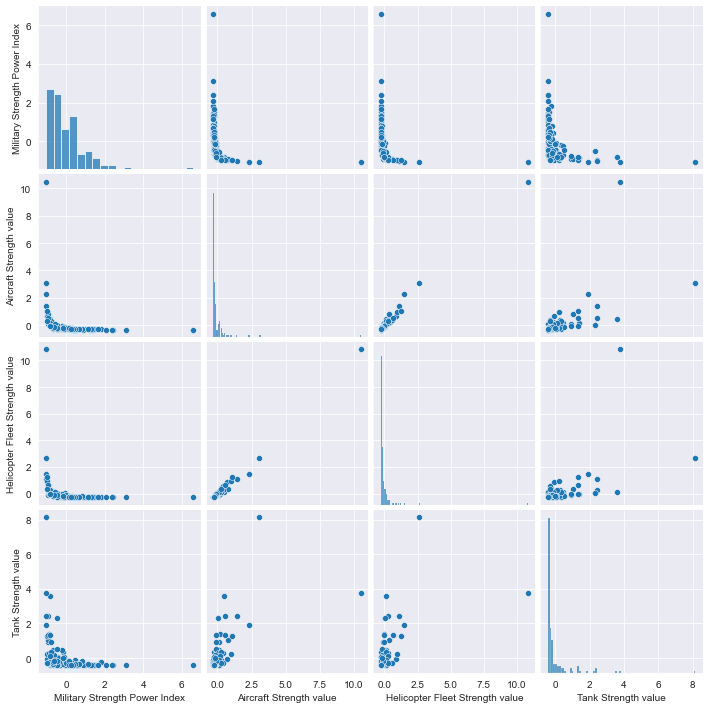

In [45]:
sns.pairplot(X_scaled.iloc[:,[0,1,6,8]]);

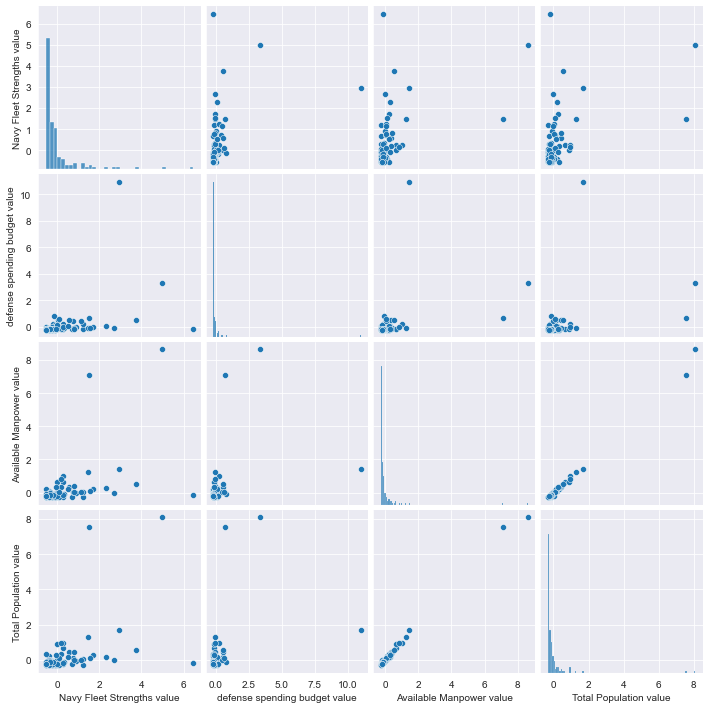

In [46]:
sns.pairplot(X_scaled.iloc[:,[13,18,24,25]]);

### 3.9. Decriptive statistics

In [47]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
Aircraft Strength value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
Fighter/Interceptor Strength value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
Attack Aircraft Strength value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
Transport Aircraft Fleet Strength value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
Trainer Aircraft Fleet value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
Helicopter Fleet Strength value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
Attack Helicopter Fleet Strength value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
Tank Strength value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
AFV/APC Strength value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


## 4. Data Preprocessing

In [48]:
# Scaling was done above.

## 5. Modelling with K-Means

### 5.1. Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [49]:
from pyclustertend import hopkins

In [50]:
X_scaled.shape

(138, 26)

In [51]:
hopkins(X_scaled, X_scaled.shape[0])

0.07566260450241727

The dataset has high clusterability.

### 5.2. Clustering with K-means

#### 5.2.1. Elbow Method 
#### We use this method to find optimal k value by looking up to break point of graph. 

In [52]:
ssd = []

K = range(2,15)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

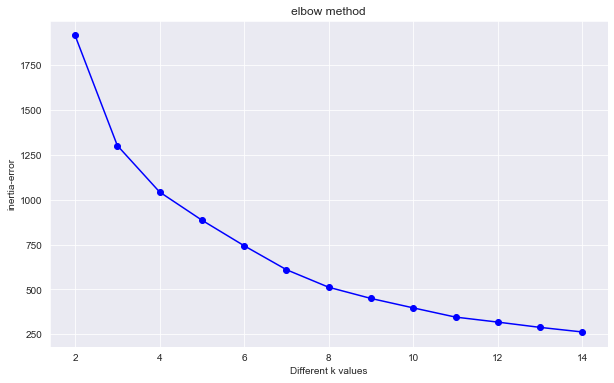

In [53]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method"); 

In [54]:
ssd

[1914.8988009153632,
 1301.7120698014176,
 1042.9611588819985,
 886.052914281842,
 743.5610497710966,
 610.2141688207317,
 512.335895380181,
 450.02601297356244,
 397.4865464139257,
 346.14415930707986,
 318.2526530724428,
 288.84857221496253,
 263.2633851574339]

In [55]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,613.187
3,258.751
4,156.908
5,142.492
6,133.347
7,97.878
8,62.310
9,52.539
10,51.342


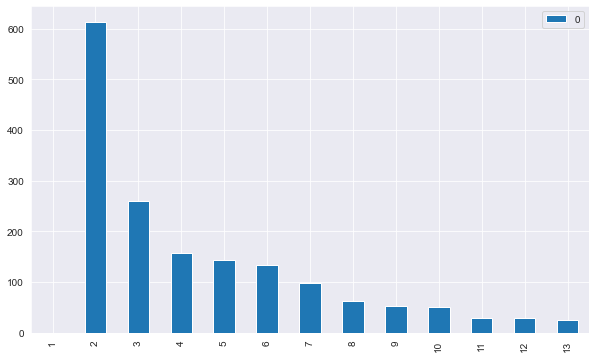

In [56]:
df_diff.plot(kind='bar');

<IPython.core.display.Javascript object>

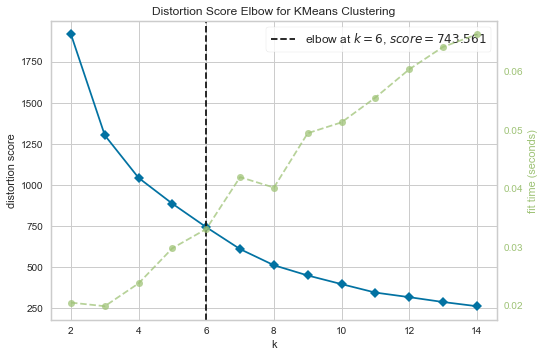

In [57]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,15))

visualizer.fit(X_scaled)        
visualizer.show();

#### 5.2.2. Silhouette Analysis

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
range_n_clusters = range(2,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

<IPython.core.display.Javascript object>

For n_clusters=2, the silhouette score is 0.8632584034182145


<IPython.core.display.Javascript object>

For n_clusters=3, the silhouette score is 0.8175531660446754


<IPython.core.display.Javascript object>

For n_clusters=4, the silhouette score is 0.4941837230746654


<IPython.core.display.Javascript object>

For n_clusters=5, the silhouette score is 0.5164174302723292


<IPython.core.display.Javascript object>

For n_clusters=6, the silhouette score is 0.5115586895835443


<IPython.core.display.Javascript object>

For n_clusters=7, the silhouette score is 0.47692135876463515


<IPython.core.display.Javascript object>

For n_clusters=8, the silhouette score is 0.46721633158311837


<IPython.core.display.Javascript object>

For n_clusters=9, the silhouette score is 0.41205613942468394


<IPython.core.display.Javascript object>

For n_clusters=10, the silhouette score is 0.2386538051719604


<IPython.core.display.Javascript object>

For n_clusters=11, the silhouette score is 0.28358020165305603


<IPython.core.display.Javascript object>

For n_clusters=12, the silhouette score is 0.2786539846089263


<IPython.core.display.Javascript object>

For n_clusters=13, the silhouette score is 0.3014140124946625


<IPython.core.display.Javascript object>

For n_clusters=14, the silhouette score is 0.26359360180671343


#### I decided to continue with n_clusters=3.

### 5.3. Model Building and label visualisation

In [60]:
model = KMeans(n_clusters=3, random_state=42)
model.fit_predict(X_scaled)

<IPython.core.display.Javascript object>

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

### 5.4. Evaluate 

In [61]:
df["predicted_clusters"] = model.labels_

In [62]:
X_scaled['predicted_clusters'] = model.labels_

In [63]:
df[['Country', 'predicted_clusters']]

,Country,predicted_clusters
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Argentina,0
5,Armenia,0
6,Australia,0
7,Austria,0
8,Azerbaijan,0
9,Bahrain,0


In [64]:
clus_pred = X_scaled.iloc[:,[0,1,2,3,4,5,6,7,8,9,-1]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
Military Strength Power Index,0.031,-1.061,-1.049
Aircraft Strength value,-0.129,10.489,2.262
Fighter/Interceptor Strength value,-0.143,8.730,3.484
Attack Aircraft Strength value,-0.150,7.318,4.274
Transport Aircraft Fleet Strength value,-0.140,9.944,2.925
Trainer Aircraft Fleet value,-0.108,10.670,1.280
Helicopter Fleet Strength value,-0.120,10.832,1.732
Attack Helicopter Fleet Strength value,-0.131,9.708,2.606
Tank Strength value,-0.121,3.737,4.151
AFV/APC Strength value,-0.136,6.820,3.788


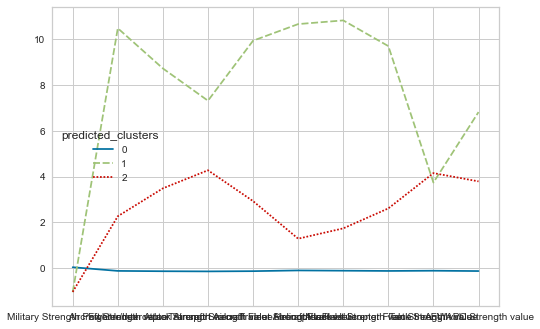

In [65]:
sns.lineplot(data = clus_pred);

In [66]:
clus_pred = X_scaled.iloc[:,[10,11,12,13,14,15,16,-1]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
Self-Propelled Artillery Strength value,-0.117,1.828,4.610
Towed Artillery Strength value,-0.124,2.922,4.543
Rocket Projector Strength value,-0.116,2.505,4.355
Navy Fleet Strengths value,-0.098,2.948,3.411
Aircraft Carrier Fleet Strength value,-0.094,10.948,0.564
Submarine Fleet Strength value,-0.119,4.880,3.670
Destroyer Fleet Strength value,-0.119,9.736,2.060


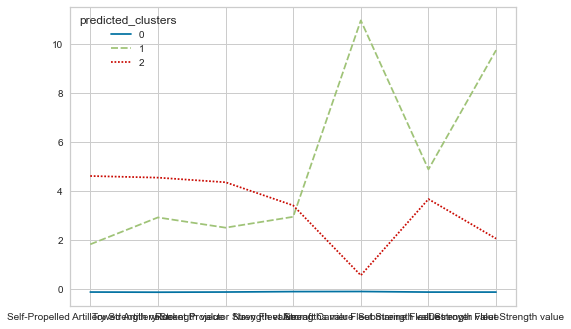

In [67]:
sns.lineplot(data = clus_pred);

In [68]:
clus_pred = X_scaled.iloc[:,[17,18,19,20,21,22,23,24,25,-1]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
Frigate Fleet Strength value,-0.076,-0.497,3.559
defense spending budget value,-0.116,10.974,1.511
External Debt value,-0.075,9.449,0.196
Airport Totals value,-0.089,10.941,0.331
Oil Production value,-0.100,5.278,2.688
Oil Consumption value,-0.134,8.930,3.026
Proven Oil Reserves value,-0.017,0.577,0.582
Available Manpower value,-0.132,1.418,5.418
Total Population value,-0.133,1.678,5.398


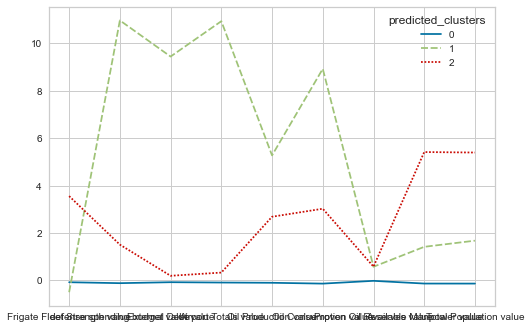

In [69]:
sns.lineplot(data = clus_pred);

In [70]:
X2 = X_scaled.iloc[:, [1,4,5,6,7,14,16,18,19,20]]
X2

,Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Aircraft Carrier Fleet Strength value,Destroyer Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value
0,-0.105,-0.003,-0.345,0.064,-0.264,-0.177,-0.196,-0.030,-0.281,-0.204
1,-0.301,-0.329,-0.345,-0.261,-0.264,-0.177,-0.196,-0.205,-0.277,-0.237
2,0.132,0.313,0.017,0.199,0.200,-0.177,-0.196,-0.015,-0.279,-0.110
3,-0.076,-0.003,-0.149,-0.054,-0.110,-0.177,-0.196,-0.104,-0.259,-0.094
4,-0.132,-0.231,-0.078,-0.104,-0.264,-0.177,0.240,-0.146,-0.165,0.702
5,-0.264,-0.296,-0.291,-0.226,-0.058,-0.177,-0.196,-0.188,-0.277,-0.231
6,0.062,0.084,0.380,-0.041,-0.037,0.935,0.022,0.183,0.649,0.157
7,-0.219,-0.209,-0.212,-0.178,-0.264,-0.177,-0.196,-0.158,0.060,-0.197
8,-0.197,-0.318,-0.224,-0.127,-0.089,-0.177,-0.196,-0.167,-0.273,-0.209
9,-0.228,-0.307,-0.191,-0.172,-0.037,-0.177,-0.196,-0.188,-0.254,-0.237


In [71]:
hopkins(X2, X2.shape[0])

0.041564798004133194

In [72]:
ssd = []

K = range(2,15)

for k in K:
    model3 = KMeans(n_clusters=k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

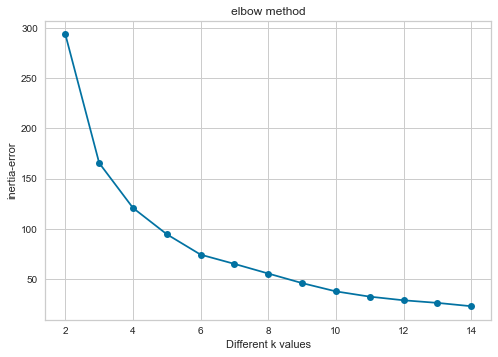

In [73]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [74]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,128.244
3,44.800
4,26.233
5,20.340
6,9.216
7,9.616
8,9.533
9,8.261
10,5.249


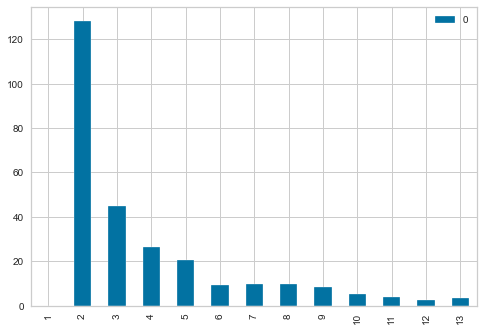

In [75]:
df_diff.plot(kind='bar');

<IPython.core.display.Javascript object>

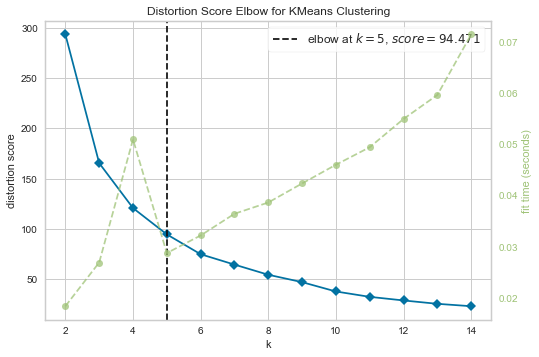

In [76]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,15))

visualizer.fit(X2)        
visualizer.show();

In [77]:
range_n_clusters = range(2,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

<IPython.core.display.Javascript object>

For n_clusters=2, the silhouette score is 0.9541121111474936


<IPython.core.display.Javascript object>

For n_clusters=3, the silhouette score is 0.7976938644547126


<IPython.core.display.Javascript object>

For n_clusters=4, the silhouette score is 0.7499758001247175


<IPython.core.display.Javascript object>

For n_clusters=5, the silhouette score is 0.6615953747169165


<IPython.core.display.Javascript object>

For n_clusters=6, the silhouette score is 0.649830573678682


<IPython.core.display.Javascript object>

For n_clusters=7, the silhouette score is 0.6105240125488797


<IPython.core.display.Javascript object>

For n_clusters=8, the silhouette score is 0.49844622206300454


<IPython.core.display.Javascript object>

For n_clusters=9, the silhouette score is 0.6313512617618536


<IPython.core.display.Javascript object>

For n_clusters=10, the silhouette score is 0.4738708373608936


<IPython.core.display.Javascript object>

For n_clusters=11, the silhouette score is 0.49457338985347865


<IPython.core.display.Javascript object>

For n_clusters=12, the silhouette score is 0.48322847469752617


<IPython.core.display.Javascript object>

For n_clusters=13, the silhouette score is 0.49453602405147346


<IPython.core.display.Javascript object>

For n_clusters=14, the silhouette score is 0.4817995786881915


#### I changed the n_clusters from 3 to 4 following the silhouette scores.

### 5.5. Final Model

In [78]:
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit_predict(X2)

<IPython.core.display.Javascript object>

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [79]:
X2["predicted_clusters_updated"] = final_model.labels_

In [80]:
X2['country'] = df['Country']

In [81]:
X2[['country', 'predicted_clusters_updated']]

,country,predicted_clusters_updated
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Angola,1
4,Argentina,1
5,Armenia,1
6,Australia,1
7,Austria,1
8,Azerbaijan,1
9,Bahrain,1


### The final clustering seems to be appropriate.
- 0 - United States: The only super power in the world
- 1 - All other countries that have weak to medium level military power.
- 2 - China, Russia which have military powers close to a super power.
- 3 - France, Germany, India, Italy, Japan, South Korea, United Kingdom, which have medium to high level military power.

## 6. Modeling with Hierarchical Clustering

### 6.1. Dendogram

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [85]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

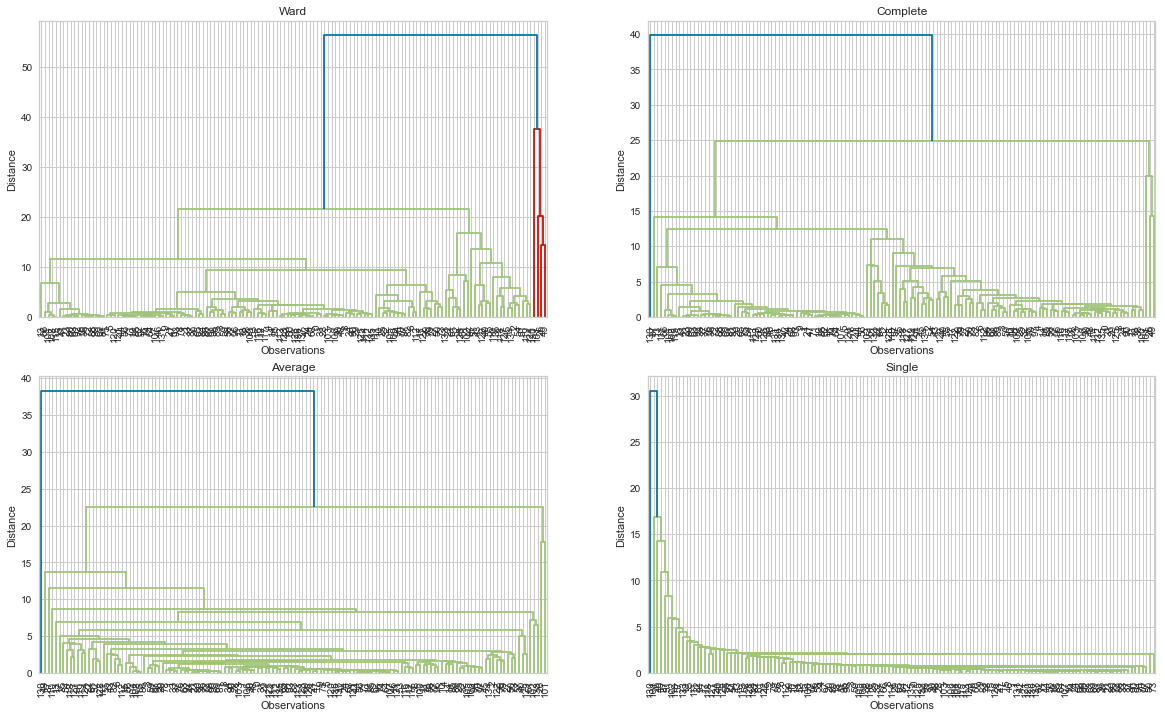

In [86]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

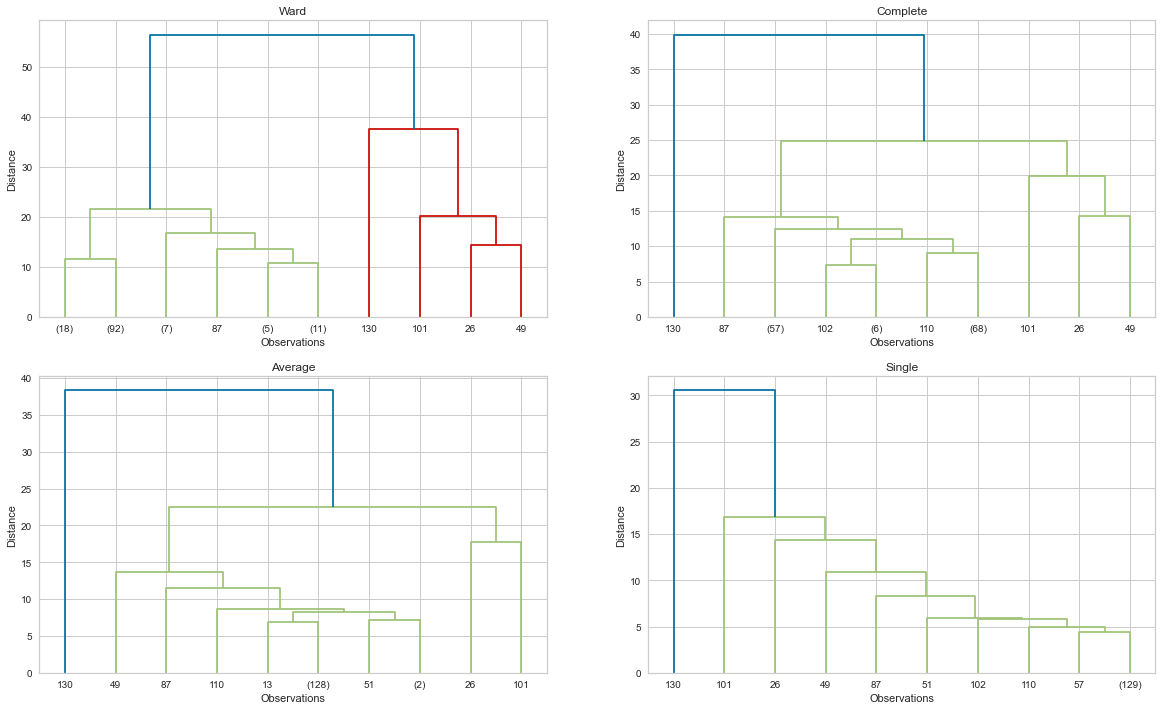

In [87]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### 6.2. Model Building and label visualisation

In [140]:
from sklearn.cluster import AgglomerativeClustering

In [141]:
from sklearn.metrics import silhouette_score

In [142]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.8459481392618563
Silhouette Score for 3 clusters: 0.8185689637244167
Silhouette Score for 4 clusters: 0.5031172881329695
Silhouette Score for 5 clusters: 0.5033436966429616
Silhouette Score for 6 clusters: 0.5117259694619082
Silhouette Score for 7 clusters: 0.5111946552668103
Silhouette Score for 8 clusters: 0.49400590548341045
Silhouette Score for 9 clusters: 0.26528620332118535


#### I will continue with k=3

In [143]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0])

In [144]:
X3 = X_scaled.iloc[:, [1,4,5,6,7,14,16,18,19,20]]
X3.head()

,Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Aircraft Carrier Fleet Strength value,Destroyer Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value
0,-0.105,-0.003,-0.345,0.064,-0.264,-0.177,-0.196,-0.030,-0.281,-0.204
1,-0.301,-0.329,-0.345,-0.261,-0.264,-0.177,-0.196,-0.205,-0.277,-0.237
2,0.132,0.313,0.017,0.199,0.200,-0.177,-0.196,-0.015,-0.279,-0.110
3,-0.076,-0.003,-0.149,-0.054,-0.110,-0.177,-0.196,-0.104,-0.259,-0.094
4,-0.132,-0.231,-0.078,-0.104,-0.264,-0.177,0.240,-0.146,-0.165,0.702


In [95]:
hc_ward = linkage(y = X3, method = "ward")
hc_complete = linkage(X3, "complete")
hc_average = linkage(X3, "average")
hc_single = linkage(X3, "single")

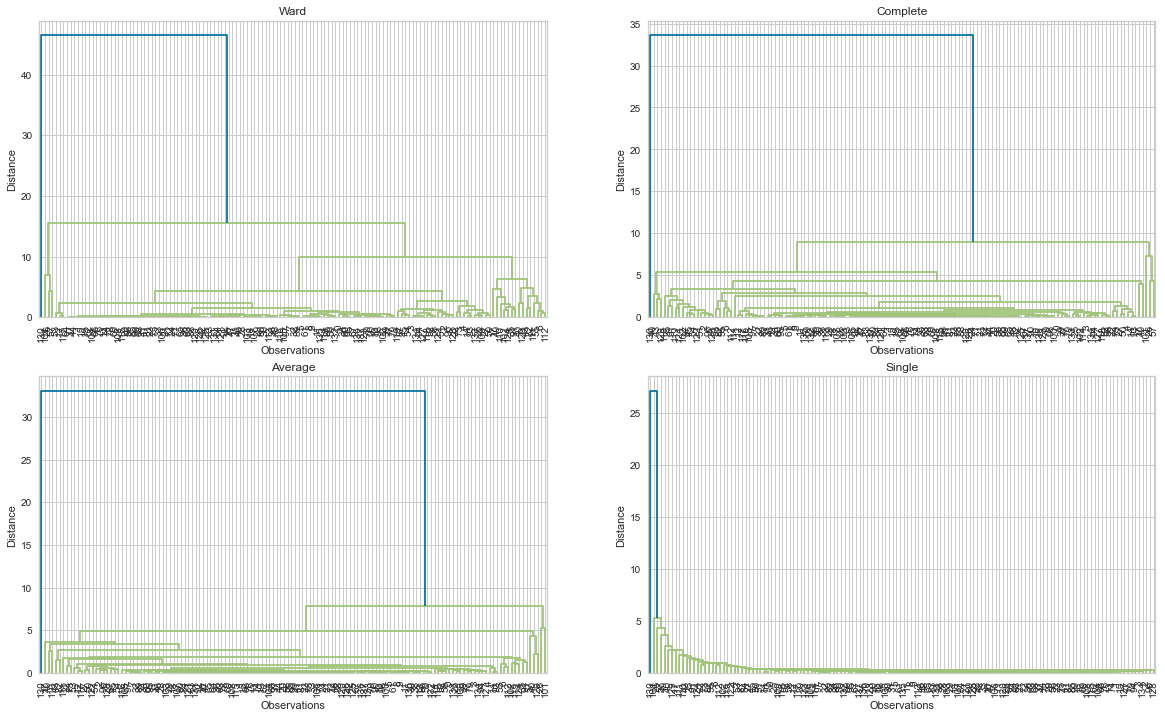

In [98]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

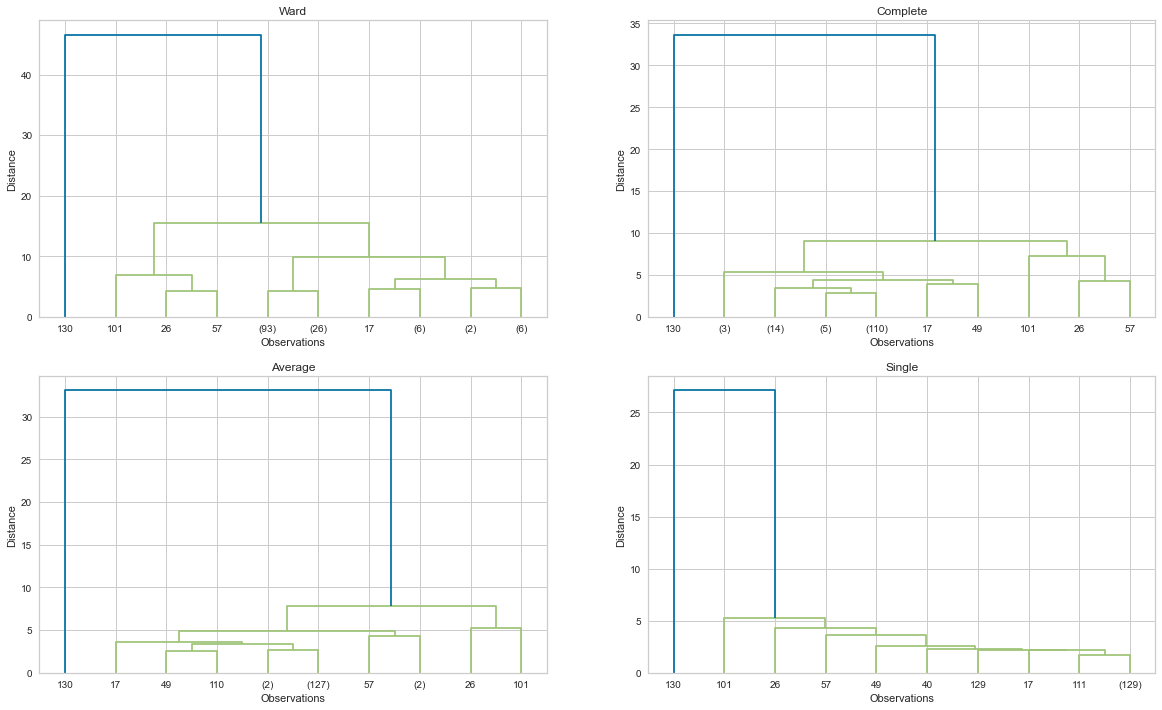

In [96]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [145]:
K = range(2,15)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X3, model.labels_)}')

Silhouette Score for 2 clusters: 0.9541121111474936
Silhouette Score for 3 clusters: 0.8374156368772799
Silhouette Score for 4 clusters: 0.6838757524017893
Silhouette Score for 5 clusters: 0.6841369726124268
Silhouette Score for 6 clusters: 0.6894910982241329
Silhouette Score for 7 clusters: 0.6541891415527706
Silhouette Score for 8 clusters: 0.6572166246267966
Silhouette Score for 9 clusters: 0.6559137678525782
Silhouette Score for 10 clusters: 0.46530804801607434
Silhouette Score for 11 clusters: 0.4723977836623215
Silhouette Score for 12 clusters: 0.4750241820600159
Silhouette Score for 13 clusters: 0.4763808595278399
Silhouette Score for 14 clusters: 0.4803393235763686


#### I will stick to k=3

In [146]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", 
                                      linkage = "ward")
clusters = final_model.fit_predict(X3)

### Evaluate 

In [147]:
X3.head()

,Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Aircraft Carrier Fleet Strength value,Destroyer Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value
0,-0.105,-0.003,-0.345,0.064,-0.264,-0.177,-0.196,-0.030,-0.281,-0.204
1,-0.301,-0.329,-0.345,-0.261,-0.264,-0.177,-0.196,-0.205,-0.277,-0.237
2,0.132,0.313,0.017,0.199,0.200,-0.177,-0.196,-0.015,-0.279,-0.110
3,-0.076,-0.003,-0.149,-0.054,-0.110,-0.177,-0.196,-0.104,-0.259,-0.094
4,-0.132,-0.231,-0.078,-0.104,-0.264,-0.177,0.240,-0.146,-0.165,0.702


In [148]:
X3["predicted_clusters"] = clusters

In [149]:
X3['country'] = X2['country']

In [150]:
X3.head()

,Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Aircraft Carrier Fleet Strength value,Destroyer Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,predicted_clusters,country
0,-0.105,-0.003,-0.345,0.064,-0.264,-0.177,-0.196,-0.030,-0.281,-0.204,0,Afghanistan
1,-0.301,-0.329,-0.345,-0.261,-0.264,-0.177,-0.196,-0.205,-0.277,-0.237,0,Albania
2,0.132,0.313,0.017,0.199,0.200,-0.177,-0.196,-0.015,-0.279,-0.110,0,Algeria
3,-0.076,-0.003,-0.149,-0.054,-0.110,-0.177,-0.196,-0.104,-0.259,-0.094,0,Angola
4,-0.132,-0.231,-0.078,-0.104,-0.264,-0.177,0.240,-0.146,-0.165,0.702,0,Argentina


In [151]:
X3[['country', 'predicted_clusters']]

,country,predicted_clusters
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Argentina,0
5,Armenia,0
6,Australia,0
7,Austria,0
8,Azerbaijan,0
9,Bahrain,0


### The final clustering seems to be appropriate.
- 0 - All other countries that have weak to medium level military power.
- 1 - United States: The only super power in the world
- 2 - China, Russia, Japan which have military powers close to a super power.

# K-Means provided us with more satisfying results than hieararchical clustering.